### Question 1(d)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

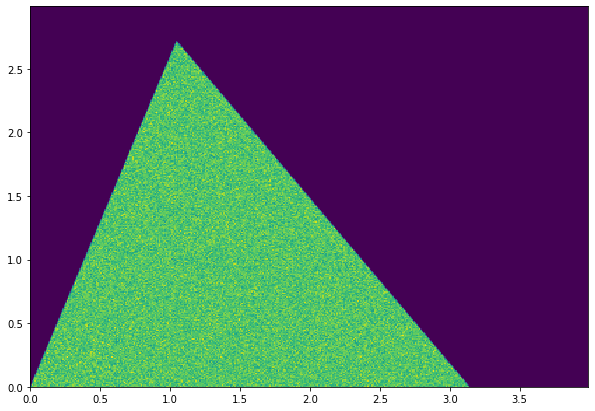

In [4]:
def sampleTriangle(X, Y):
    num = Y + (3*math.exp(1)*X)/2*math.pi - 3*math.exp(1)/2
    deno = 1+9*(math.exp(1)**2)/4*(math.pi**2)
    x = np.where(Y + 3*math.exp(1)*X/(2*math.pi) - 3*math.exp(1)/2 < 0, X, X + (3*math.exp(1)/2*math.pi)*((-2)*num/deno))
    y = np.where(Y + 3*math.exp(1)*X/(2*math.pi) - 3*math.exp(1)/2 < 0, Y, Y - 2*num/deno)
    return x, y

def paralleloRandom(A, B, C):
    v1 = B-A
    v2 = C-A
    a = np.random.uniform(0.0, 1.0, 10**7)
    b = np.random.uniform(0.0, 1.0, 10**7)

    X = a*v1[0] + b*v2[0] + A[0]
    Y = a*v1[1] + b*v2[1] + A[1]
    X, Y = sampleTriangle(X, Y)
    return X, Y

X, Y = paralleloRandom(np.array([0,0]), np.array([math.pi, 0]), np.array([math.pi/3 , math.exp(1)]))
# plt.triplot([])

plt.figure(figsize=(10,7))
# plt.plot(X, Y, color = "blue")
plt.hist2d(X, Y, bins = [np.arange(0, 4, 0.01), np.arange(0, 3, 0.01)])
plt.show()





### Question 1(b)

### ***Inverse CDF Method***

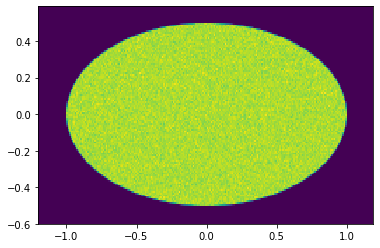

In [3]:
a = 1
b = 0.5

def Radius(x):
    return a*b/(np.sqrt((b*np.cos(x))**2 + (a*np.sin(x))**2))

def CDFThetaInv(x):
    exp = math.atan(math.tan(2*math.pi*x)/2)
    theta = 0
    if(x <= 0.25):
        theta = exp
    elif(x <= 0.75):
        theta = math.pi + exp
    else:
        theta = 2*math.pi + exp
        
    return theta

def CDFRadiusInv(theta):
    R = Radius(theta)
    X = np.random.uniform(0.0, 1.0, 10**7)
    radius = R*np.sqrt(X)
    
    return radius

X = np.array([CDFThetaInv(x) for x in np.random.uniform(0.0, 1.0, 10**7)])
Y = CDFRadiusInv(X)

A = Y*np.cos(X)
B = Y*np.sin(X)

plt.hist2d(A, B, bins=[np.arange(-1.2, 1.2, 0.01), np.arange(-0.6, 0.6, 0.01)])
plt.show()
